In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import contractions
import re
import emoji
import nltk
import pickle
import spacy
#import TextBlob

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
nltk.download('punkt')
nltk.download('punkt_tab')
# Download the stopwords resource
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ramme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ramme\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
df = pd.read_csv('./Mobile_all_reviews.csv')
df.head()

,Product_ID,Ratings,Reviews,Mobile Name
0,MOBHY9N796YGFJY2,3,Speaker is so bad you cant even imagine and camera is haa thuu\nbut all other perfomance is quite good,SAMSUNG Galaxy F55 5G
1,MOBHY9N796YGFJY2,3,Not very good phone because price is very high 28 k\nCamera quality so bad\nBattery backup 4855 mAh\nAnd speaker so bad,SAMSUNG Galaxy F55 5G
2,MOBHY9N796YGFJY2,5,Camera is good design is very good. Battery is also good,SAMSUNG Galaxy F55 5G
3,MOBHY9N796YGFJY2,3,Poor camera\nDespite 5000 mah poor battery life,SAMSUNG Galaxy F55 5G
4,MOBHY9N796YGFJY2,4,Perfect in this price range.,SAMSUNG Galaxy F55 5G


In [8]:
#Data Cleaning

In [9]:
df.shape

(567, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product_ID   567 non-null    object
 1   Ratings      567 non-null    int64 
 2   Reviews      567 non-null    object
 3   Mobile Name  567 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.8+ KB


In [11]:
#Finding null values
df.isnull().sum()

Product_ID     0
Ratings        0
Reviews        0
Mobile Name    0
dtype: int64

In [12]:
#Checking spelling mistakes in the Mobile Name column
df['Mobile Name'].unique()


array(['SAMSUNG Galaxy F55 5G', 'SAMSUNG Galaxy A35 5G',
       'MOTOROLA Edge 50 Neo', 'OnePlus Nord CE4 lite 5G',
       'realme P1 Pro 5G', 'vivo T3 Pro 5G'], dtype=object)

In [13]:

# Consolidated function to clean text
def clean_text(text):
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation, special characters, and numbers
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    text = ''.join([char for char in text if not char.isdigit()])  # Remove numbers

    # Remove extra spaces
    text = ' '.join(text.split())

    # Remove contractions
    text = contractions.fix(text)

    # Convert to lowercase
    text = text.lower()
    
    return text

# Apply the clean_text function to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(clean_text)

# Print the cleaned DataFrame
print(df)

# Save the cleaned data back to a new CSV file
df.to_csv('Mobile_reviews_cleaned.csv', index=False)


           Product_ID  Ratings  \
0    MOBHY9N796YGFJY2        3   
1    MOBHY9N796YGFJY2        3   
2    MOBHY9N796YGFJY2        5   
3    MOBHY9N796YGFJY2        3   
4    MOBHY9N796YGFJY2        4   
..                ...      ...   
562  MOBH3XHR46RHEMVH        5   
563  MOBH3XHR46RHEMVH        4   
564  MOBH3XHR46RHEMVH        4   
565  MOBH3XHR46RHEMVH        4   
566  MOBH3XHR46RHEMVH        4   

                                                                                                                                                                                            Reviews  \
0                                                                                           speaker is so bad you cannot even imagine and camera is haa thuu but all other perfomance is quite good   
1                                                                                      not very good phone because price is very high k camera quality so bad battery backup mah and speaker so b

In [14]:
df.head()

,Product_ID,Ratings,Reviews,Mobile Name
0,MOBHY9N796YGFJY2,3,speaker is so bad you cannot even imagine and camera is haa thuu but all other perfomance is quite good,SAMSUNG Galaxy F55 5G
1,MOBHY9N796YGFJY2,3,not very good phone because price is very high k camera quality so bad battery backup mah and speaker so bad,SAMSUNG Galaxy F55 5G
2,MOBHY9N796YGFJY2,5,camera is good design is very good battery is also good,SAMSUNG Galaxy F55 5G
3,MOBHY9N796YGFJY2,3,poor camera despite mah poor battery life,SAMSUNG Galaxy F55 5G
4,MOBHY9N796YGFJY2,4,perfect in this price range,SAMSUNG Galaxy F55 5G


In [15]:
#Data transformation

In [16]:
#Check for blank or space in reviews.
blank=[]
for i,j,k,l,m in df.itertuples():
  if type(k)==str:
    if k.isspace():
      blank.append(i)

In [17]:
df.loc[blank]

,Product_ID,Ratings,Reviews,Mobile Name


In [18]:
df.Ratings.value_counts()

Ratings
5    345
4    111
1     51
3     46
2     14
Name: count, dtype: int64

C:\Users\ramme\AppData\Local\Temp\ipykernel_952\839067069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ratings', data=df, palette='viridis')


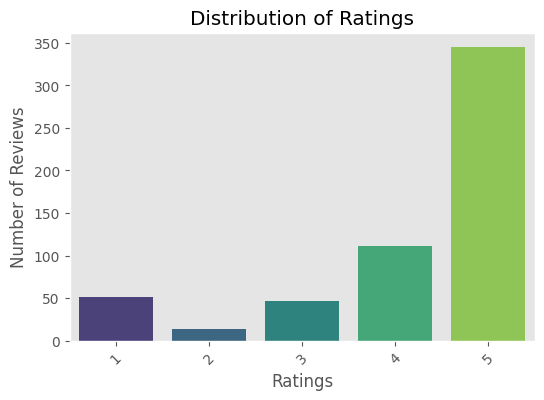

In [19]:

#Plot Rating Distribution
#axes=df['Ratings'].value_counts().sort_index().plot(kind='bar',title='Ratings',figsize=(10,5))

plt.figure(figsize=(6, 4))
sns.countplot(x='Ratings', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [92]:
# Labeling sentiment score based on ratings
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating <= 2:
        return "negative"
    else:
        return "neutral"  # Optionally, handle neutral ratings (3 stars)

# Apply the labeling function to your ratings column
df['label'] = df['Ratings'].apply(label_sentiment)

C:\Users\ramme\AppData\Local\Temp\ipykernel_952\1284920928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


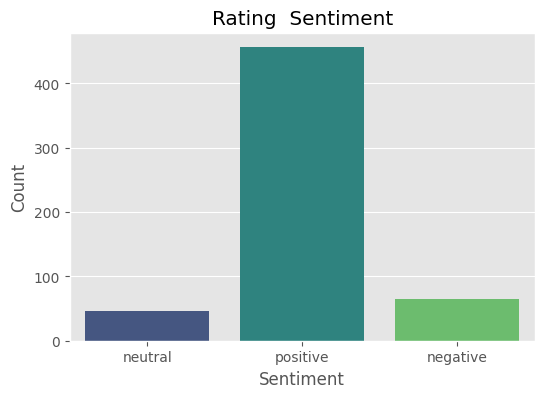

In [95]:
plt.figure(figsize=(6 ,4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Rating  Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\ramme\AppData\Local\Temp\ipykernel_952\897317401.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mobiles.values, y=top_mobiles.index, palette='magma')


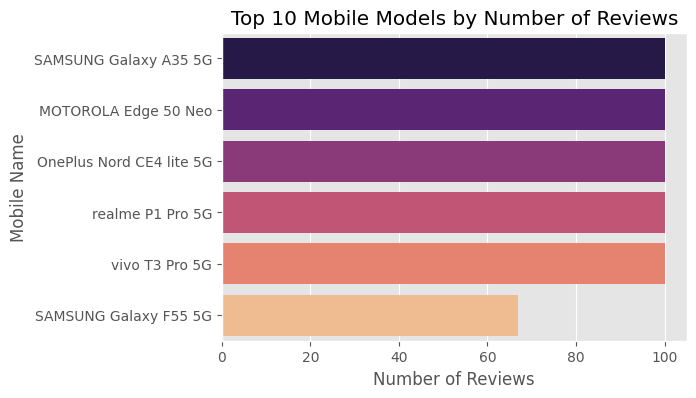

In [96]:
#Top Reviewed Mobile Models
top_mobiles = df['Mobile Name'].value_counts().head(10)

plt.figure(figsize=(6,4))
sns.barplot(x=top_mobiles.values, y=top_mobiles.index, palette='magma')
plt.title('Top 10 Mobile Models by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Mobile Name')
plt.show()

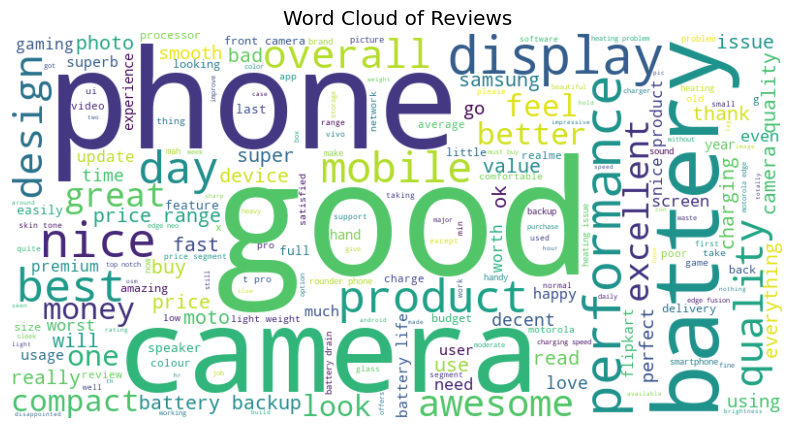

In [97]:
from wordcloud import WordCloud

text = " ".join(review for review in df['Reviews'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [20]:
# Duplicate is there so copying data into df1
df1 = df.copy()

In [21]:
#NLP

In [22]:
#Sentiment Analysis using Vader lexicon 

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

# Apply the sentiment intensity analyzer to the 'msg_lemmatized' column
df['polarity_scores'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x))

# If you want separate columns for each score (compound, neg, neu, pos)
df['neg'] = df['polarity_scores'].apply(lambda score_dict: score_dict['neg'])
df['neu'] = df['polarity_scores'].apply(lambda score_dict: score_dict['neu'])
df['pos'] = df['polarity_scores'].apply(lambda score_dict: score_dict['pos'])
df['Vader_Polarity'] = df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Product_ID,Ratings,Reviews,Mobile Name,polarity_scores,neg,neu,pos,Vader_Polarity
0,MOBHY9N796YGFJY2,3,speaker is so bad you cannot even imagine and camera is haa thuu but all other perfomance is quite good,SAMSUNG Galaxy F55 5G,"{'neg': 0.11, 'neu': 0.719, 'pos': 0.171, 'compound': 0.3703}",0.110,0.719,0.171,0.3703
1,MOBHY9N796YGFJY2,3,not very good phone because price is very high k camera quality so bad battery backup mah and speaker so bad,SAMSUNG Galaxy F55 5G,"{'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'compound': -0.9119}",0.406,0.594,0.000,-0.9119
2,MOBHY9N796YGFJY2,5,camera is good design is very good battery is also good,SAMSUNG Galaxy F55 5G,"{'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8271}",0.000,0.479,0.521,0.8271
3,MOBHY9N796YGFJY2,3,poor camera despite mah poor battery life,SAMSUNG Galaxy F55 5G,"{'neg': 0.554, 'neu': 0.446, 'pos': 0.0, 'compound': -0.7351}",0.554,0.446,0.000,-0.7351
4,MOBHY9N796YGFJY2,4,perfect in this price range,SAMSUNG Galaxy F55 5G,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}",0.000,0.519,0.481,0.5719


In [76]:
#To get sentiment score
df['Vader_sentiment'] = df['Vader_Polarity'].apply(lambda x: "positive" if x >= 0.5 else ("negative" if x <= -0.5 else "neutral"))


In [77]:
df.head()

,Product_ID,Ratings,Reviews,Mobile Name,polarity_scores,neg,neu,pos,Vader_Polarity,Vader_sentiment,label
0,MOBHY9N796YGFJY2,3,speaker is so bad you cannot even imagine and camera is haa thuu but all other perfomance is quite good,SAMSUNG Galaxy F55 5G,"{'neg': 0.11, 'neu': 0.719, 'pos': 0.171, 'compound': 0.3703}",0.110,0.719,0.171,0.3703,neutral,neutral
1,MOBHY9N796YGFJY2,3,not very good phone because price is very high k camera quality so bad battery backup mah and speaker so bad,SAMSUNG Galaxy F55 5G,"{'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'compound': -0.9119}",0.406,0.594,0.000,-0.9119,negative,neutral
2,MOBHY9N796YGFJY2,5,camera is good design is very good battery is also good,SAMSUNG Galaxy F55 5G,"{'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8271}",0.000,0.479,0.521,0.8271,positive,positive
3,MOBHY9N796YGFJY2,3,poor camera despite mah poor battery life,SAMSUNG Galaxy F55 5G,"{'neg': 0.554, 'neu': 0.446, 'pos': 0.0, 'compound': -0.7351}",0.554,0.446,0.000,-0.7351,negative,neutral
4,MOBHY9N796YGFJY2,4,perfect in this price range,SAMSUNG Galaxy F55 5G,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}",0.000,0.519,0.481,0.5719,positive,positive


In [69]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Flipkart_mobile_reviews_Vader_sentiment.csv', index=False)

In [ ]:
#Data Visualization

C:\Users\ramme\AppData\Local\Temp\ipykernel_952\1649220283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vader_sentiment', data=df, palette='viridis')


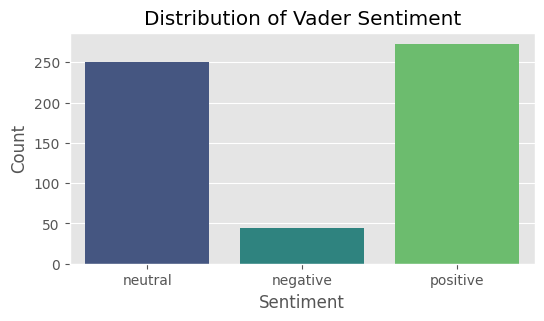

In [78]:
#Sentiment Distribution (Vader Sentiment)
plt.figure(figsize=(6, 3))
sns.countplot(x='Vader_sentiment', data=df, palette='viridis')
plt.title('Distribution of Vader Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


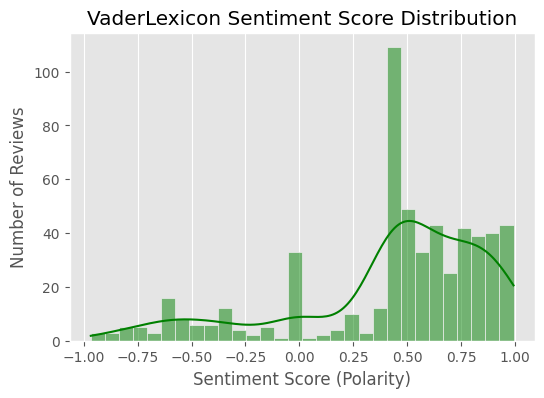

In [71]:
# Histogram of VaderLexicon Sentiment Scores
plt.figure(figsize=(6, 4))
sns.histplot(df['Vader_Polarity'], bins=30, kde=True, color='green')
plt.title('VaderLexicon Sentiment Score Distribution')
plt.xlabel('Sentiment Score (Polarity)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

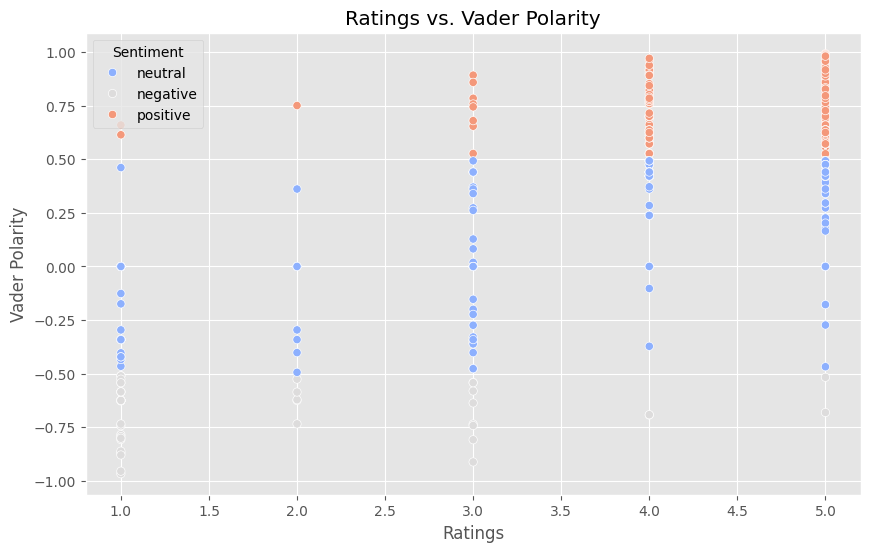

In [79]:
#Ratings vs. Vader Polarity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Vader_Polarity', data=df, hue='Vader_sentiment', palette='coolwarm')
plt.title('Ratings vs. Vader Polarity')
plt.xlabel('Ratings')
plt.ylabel('Vader Polarity')
plt.legend(title='Sentiment')
plt.show()


In [27]:
#Sentiment Analysis using textblob

In [28]:
from textblob import TextBlob

In [29]:
#tokenization
#defining function for tokenization
def tokenization(text):
    #tokens = re.split(r'\W+', text)
    tokens=nltk.word_tokenize(text)
    return tokens
#applying function to the column
df1['Reviews_token']= df1['Reviews'].apply(tokenization)

In [30]:
#Stop Word Removal
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
    
#applying the function
df1['Reviews_token']= df1['Reviews_token'].apply(lambda x:remove_stopwords(x))


In [31]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
    
df1['Reviews_stemmed']=df1['Reviews_token'].apply(lambda x: stemming(x))

In [32]:

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# def lemmatizer(text):
#     lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
#     return lemm_text
# df1['Reviews_lemmatized']=df1['Reviews_token'].apply(lambda x:lemmatizer(x))

#Function to perform lemmatization
def lemmatize_text(text):
    blob = TextBlob(text)
    lemmatized_words = [word.lemmatize() for word in blob.words]
    return ' '.join(lemmatized_words)
    
df1['Reviews'] = df1['Reviews'].apply(lemmatize_text)


In [73]:
def sentiment_score(polarity):
    if polarity  >= 0.05:
        return 'positive'
    elif polarity <= -0.05:
        return 'negative'
    else:
        return 'neutral'

def polarity_scores(text):
    return TextBlob(text).sentiment.polarity
    
df1['Textblob_Polarity'] = df1['Reviews'].apply(polarity_scores)  
df1['Textblob_Sentiment'] = df1['Textblob_Polarity'].apply(sentiment_score)  


In [34]:
df1.head()

,Product_ID,Ratings,Reviews,Mobile Name,Reviews_token,Reviews_stemmed,Textblob_Polarity,Textblob_Sentiment
0,MOBHY9N796YGFJY2,3,speaker is so bad you can not even imagine and camera is haa thuu but all other perfomance is quite good,SAMSUNG Galaxy F55 5G,"[speaker, bad, even, imagine, camera, haa, thuu, perfomance, quite, good]","[speaker, bad, even, imagin, camera, haa, thuu, perfom, quit, good]",-0.041667,neutral
1,MOBHY9N796YGFJY2,3,not very good phone because price is very high k camera quality so bad battery backup mah and speaker so bad,SAMSUNG Galaxy F55 5G,"[good, phone, price, high, k, camera, quality, bad, battery, backup, mah, speaker, bad]","[good, phone, price, high, k, camera, qualiti, bad, batteri, backup, mah, speaker, bad]",-0.365308,negative
2,MOBHY9N796YGFJY2,5,camera is good design is very good battery is also good,SAMSUNG Galaxy F55 5G,"[camera, good, design, good, battery, also, good]","[camera, good, design, good, batteri, also, good]",0.770000,positive
3,MOBHY9N796YGFJY2,3,poor camera despite mah poor battery life,SAMSUNG Galaxy F55 5G,"[poor, camera, despite, mah, poor, battery, life]","[poor, camera, despit, mah, poor, batteri, life]",-0.400000,negative
4,MOBHY9N796YGFJY2,4,perfect in this price range,SAMSUNG Galaxy F55 5G,"[perfect, price, range]","[perfect, price, rang]",1.000000,positive


In [35]:
# Save the updated DataFrame to a new CSV file
df1.to_csv('Flipkart_mobile_reviews_Textblob_sentiment.csv', index=False)

C:\Users\ramme\AppData\Local\Temp\ipykernel_952\476493302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Textblob_Sentiment', data=df1, palette='viridis')


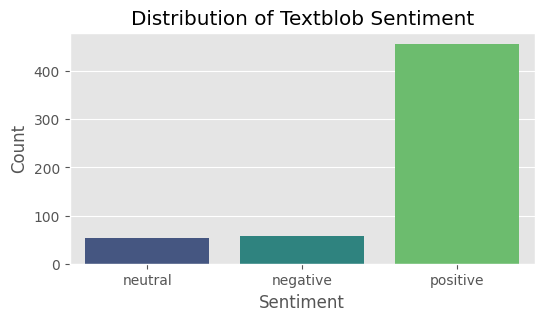

In [87]:
#Sentiment Distribution (Textblob_Sentiment)
plt.figure(figsize=(6, 3))
sns.countplot(x='Textblob_Sentiment', data=df1, palette='viridis')
plt.title('Distribution of Textblob Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


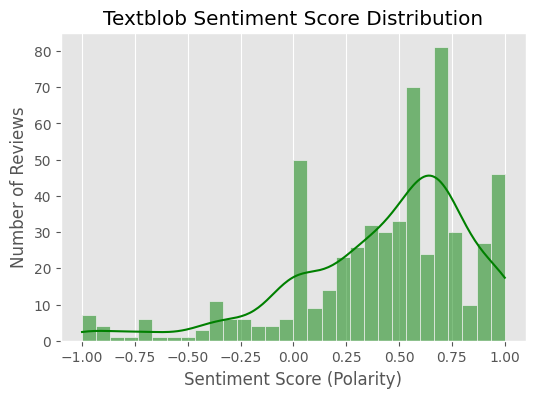

In [90]:
# Histogram of TextBlob Sentiment Scores
plt.figure(figsize=(6, 4))
sns.histplot(df1['Textblob_Polarity'], bins=30, kde=True, color='green')
plt.title('Textblob Sentiment Score Distribution')
plt.xlabel('Sentiment Score (Polarity)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

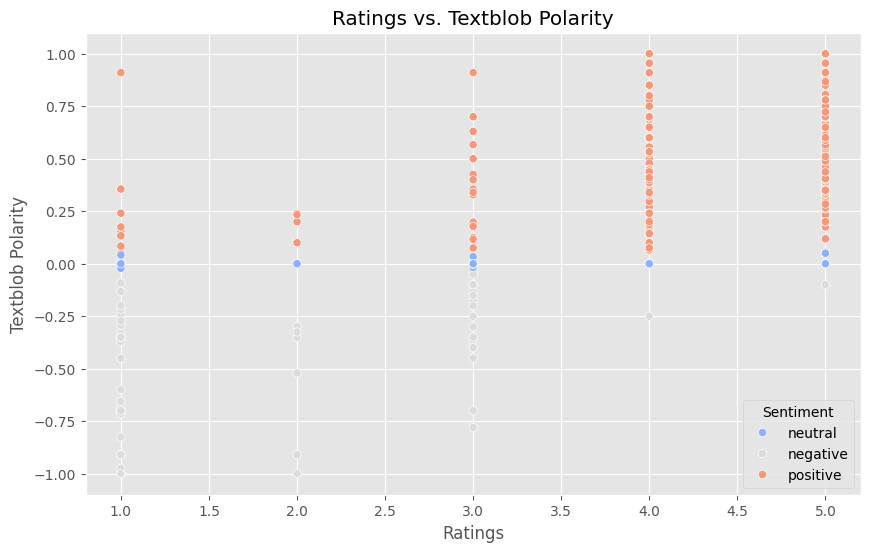

In [91]:
#Ratings vs. TextBlob Polarity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Textblob_Polarity', data=df1, hue='Textblob_Sentiment', palette='coolwarm')
plt.title('Ratings vs. Textblob Polarity')
plt.xlabel('Ratings')
plt.ylabel('Textblob Polarity')
plt.legend(title='Sentiment')
plt.show()


In [37]:
# Merge 'df' and 'df1' on the index
df_combined = pd.merge(df, df1[['Textblob_Polarity', 'Textblob_Sentiment']], left_index=True, right_index=True)

In [57]:
df_combined.head()

,Product_ID,Ratings,Reviews,Mobile Name,polarity_scores,neg,neu,pos,Vader_Polarity,Vader_sentiment,label,Textblob_Polarity,Textblob_Sentiment
0,MOBHY9N796YGFJY2,3,speaker is so bad you cannot even imagine and camera is haa thuu but all other perfomance is quite good,SAMSUNG Galaxy F55 5G,"{'neg': 0.11, 'neu': 0.719, 'pos': 0.171, 'compound': 0.3703}",0.110,0.719,0.171,0.3703,positive,neutral,-0.041667,neutral
1,MOBHY9N796YGFJY2,3,not very good phone because price is very high k camera quality so bad battery backup mah and speaker so bad,SAMSUNG Galaxy F55 5G,"{'neg': 0.406, 'neu': 0.594, 'pos': 0.0, 'compound': -0.9119}",0.406,0.594,0.000,-0.9119,negative,neutral,-0.365308,negative
2,MOBHY9N796YGFJY2,5,camera is good design is very good battery is also good,SAMSUNG Galaxy F55 5G,"{'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8271}",0.000,0.479,0.521,0.8271,positive,positive,0.770000,positive
3,MOBHY9N796YGFJY2,3,poor camera despite mah poor battery life,SAMSUNG Galaxy F55 5G,"{'neg': 0.554, 'neu': 0.446, 'pos': 0.0, 'compound': -0.7351}",0.554,0.446,0.000,-0.7351,negative,neutral,-0.400000,negative
4,MOBHY9N796YGFJY2,4,perfect in this price range,SAMSUNG Galaxy F55 5G,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}",0.000,0.519,0.481,0.5719,positive,positive,1.000000,positive


In [39]:
# Save the updated DataFrame to a new CSV file
df_combined.to_csv('Flipkart_mobile_reviews_combined_sentiment.csv', index=False)

In [40]:
#Accuracy Score between Vader sentiment score and TextBlob Sentiment score
from sklearn.metrics import accuracy_score
accuracy_score(df_combined["Vader_sentiment"], df_combined["Textblob_Sentiment"])

0.9047619047619048

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(df_combined["label"], df_combined["Vader_sentiment"])

0.8536155202821869

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(df_combined["label"], df_combined["Textblob_Sentiment"])

0.8465608465608465

In [43]:
#ML

In [44]:
import spacy

In [45]:
x=df_combined["Reviews"]
y=df_combined["label"]

In [46]:
nlp = spacy.load("en_core_web_md")
x=[nlp(i).vector for i in x]


In [47]:
x[0].shape

(300,)

In [48]:
len(x)

567

In [49]:
from sklearn.decomposition import PCA

In [50]:
enco=PCA(n_components=10)
x_pca=enco.fit_transform(x)

In [51]:
x_pca[0].shape

(10,)

In [52]:
len(x_pca)

567

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [54]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((396, 10), (171, 10), (396,), (171,))

In [55]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
y_pred=model.predict(x_test)
"accuracy:", accuracy_score(y_test, y_pred)

('accuracy:', 0.8187134502923976)